#문제 1. (총 10점)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [2]:
#그대로 실행시켜주세요

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 이미지를 -1과 1 사이로 정규화
])


In [3]:
#STL10 데이터셋을 불러옵니다
#그대로 실행시켜주세요

train_dataset = datasets.STL10(root='./data', split='train', download=True, transform=transform)
test_dataset = datasets.STL10(root='./data', split='test', download=True, transform=transform)

100%|██████████| 2640397119/2640397119 [00:45<00:00, 58592889.40it/s]


Extracting ./data/stl10_binary.tar.gz to ./data
Files already downloaded and verified


Q1. train 데이터셋의 데이터 개수, 각 이미지의 채널 및 크기를 확인하고 적으시오. (1점)

답:

데이터 개수: 5000

이미지 채널: 3

이미지 크기: 96 * 96

In [ ]:
#print(train_dataset.data.shape)

Q2. batch_size를 64로 지정하여 아래의 코드를 완성하시오. (1점)

In [22]:
train_loader = DataLoader(train_dataset,64)
test_loader = DataLoader(test_dataset,64)

Q3. 아래의 코드를 참고하여, in_channels와 output_size에 알맞은 값을 입력하시오. (2점)

In [23]:
in_channels = 3
output_size = 10

In [24]:
#그대로 실행시켜주세요
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, stride=1, padding=1), #---------A
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), #---------B
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 24 * 24, 256), #---------C
            nn.ReLU(),
            nn.Linear(256, output_size)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

Q4. 상단의 코드를 참고하여 이미지 데이터가 A, B 각각을 통과한 후의 크기를 추정하여 입력하시오. (2점)

A: 16,96,96

B: 16,48,48

Q5. C의 nn.Linear 첫번째 매개변수가 "32 x 24 x 24"인 이유를 서술하시오. (2점)

답:

In [25]:
#그대로 실행시켜주세요
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

Q6. 손실함수를 CrossEntropyLoss로, 최적화함수는 Adam으로 지정하시오. (1점)
(단, 학습률은 0.001)

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [31]:
num_epochs = 5 #원하는 값을 입력하시면 됩니다

#모델 학습
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)

        # 순전파
        outputs = model(data)
        loss = criterion(outputs, targets)

        # 역전파 및 가중치 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{batch_idx + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Q7. 학습한 모델을 바탕으로 출력한 test데이터셋에 대한 정확도는 얼마인가? (1점)

답:49.98%

In [32]:
# 모델 평가
# 그대로 실행시켜주세요

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 49.98%




# 문제 2.

In [33]:
import os
from IPython.display import Image
path = os.getcwd()
path # 본인의 현재 코드 파일 경로 확인

'/content'

### 1. 합성곱 신경망을 더 깊이 통과할수록 나타나는 "일반적인" 현상에 대해 올바르게 설명한 것은? (1점)
1) 출력 형상의 Height는 커지고 Width는 작아진다. <br/>
2) 출력 형상의 Height는 작아지고 Width는 커진다. <br/>
3) 출력 형상의 Height와 Width 모두 작아진다. <br/>
4) 출력 형상의 Height와 Width 모두 커진다.



```
# 코드로 형식 지정됨
```

답: 3

### 2. 다음과 같은 Input 데이터와 필터를 이용해 stride가 1인 합성곱 연산을 수행했을 때, Z1 + Z2 + ... + Z9는? (1점)

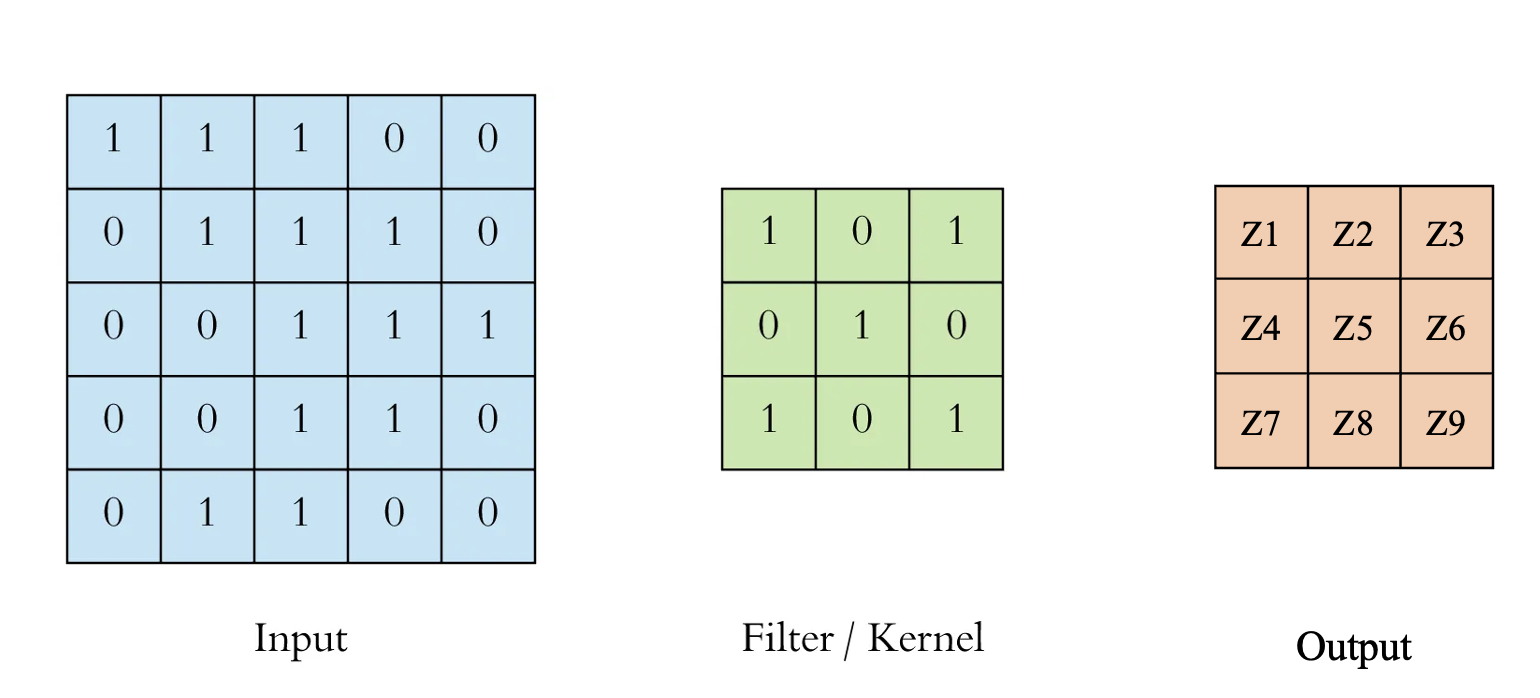

In [ ]:
Image(path + '/2.png') # 이미지가 해당 경로의 폴더 안에 정상적으로 들어있어야 이미지가 로딩됩니다!
4,3,4,
2,4,3
2,3,4


답: 29

### 3. 형상이 (C - 채널, H - 높이, W - 너비)인 데이터 D가 있다. 다음 교재 그림을 참고하여 참인 것을 모두 고르시오. (단, 패딩은 없고 D의 채널 C는 1보다 크다. 또, H,W 모두 풀링 계산에 적절한 형태라고 가정한다) (1점)

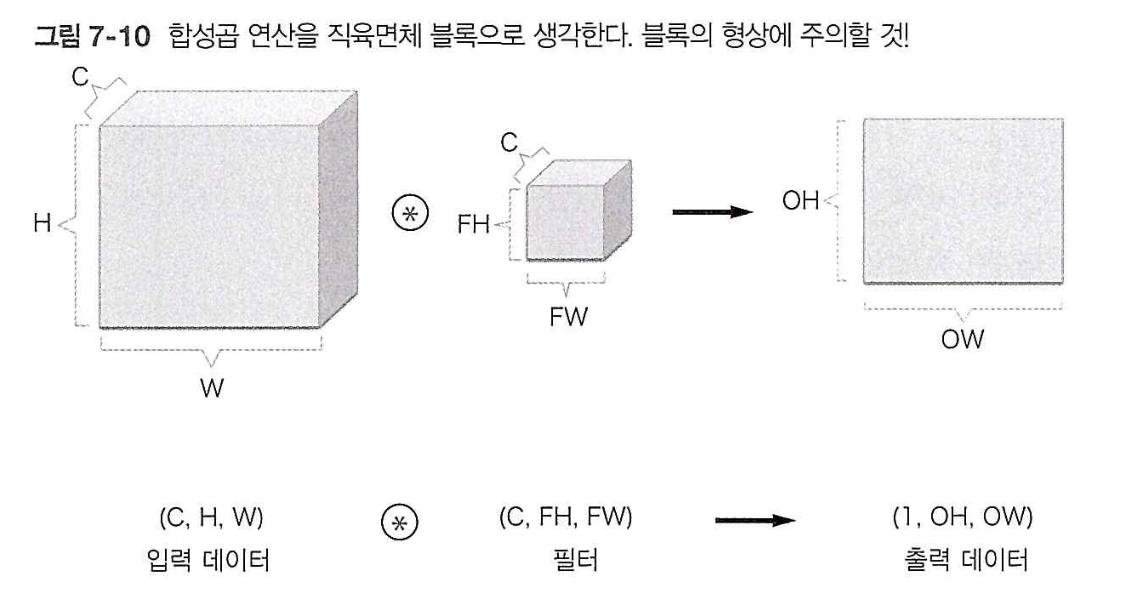

In [ ]:
Image(path + '/3.png') # 이미지가 해당 경로의 폴더 안에 정상적으로 들어있어야 이미지가 로딩됩니다!

1) D에 형상이 (C,1,1)인 필터 하나를 이용해 stride 1로 합성곱 연산을 수행하면 출력의 C는 작아지고 H,W는 변하지 않는다. <br/>
2) D에 형상이 (C,1,1)인 필터 하나를 이용해 stride 1로 합성곱 연산을 수행하면 출력의 H,W는 작아지고 C는 변하지 않는다. <br/>
3) D에 윈도우 크기를 3x3, stride를 3으로 하고 최대 풀링 연산을 수행하면 출력의 C는 작아지고 H,W는 변하지 않는다. <br/>
4) D에 윈도우 크기를 3x3, stride를 3으로 하고 최대 풀링 연산을 수행하면 출력의 H,W는 작아지고 C는 변하지 않는다. <br/>

답: 1,4

### 4.  3번에서 D의 형상이 (3, 48, 48)이었다고 가정하자. D에 형상이 (3, 5, 5)인 필터 FN개를 이용해 stride 1로 합성곱 연산을 수행했다. 패딩의 크기는 P로 설정했다. 입력과 출력의 형상을 동일하게 유지하고자 할 때 적절한 FN과 P는 얼마인가? (다음 교재 그림 참고)  (1점)

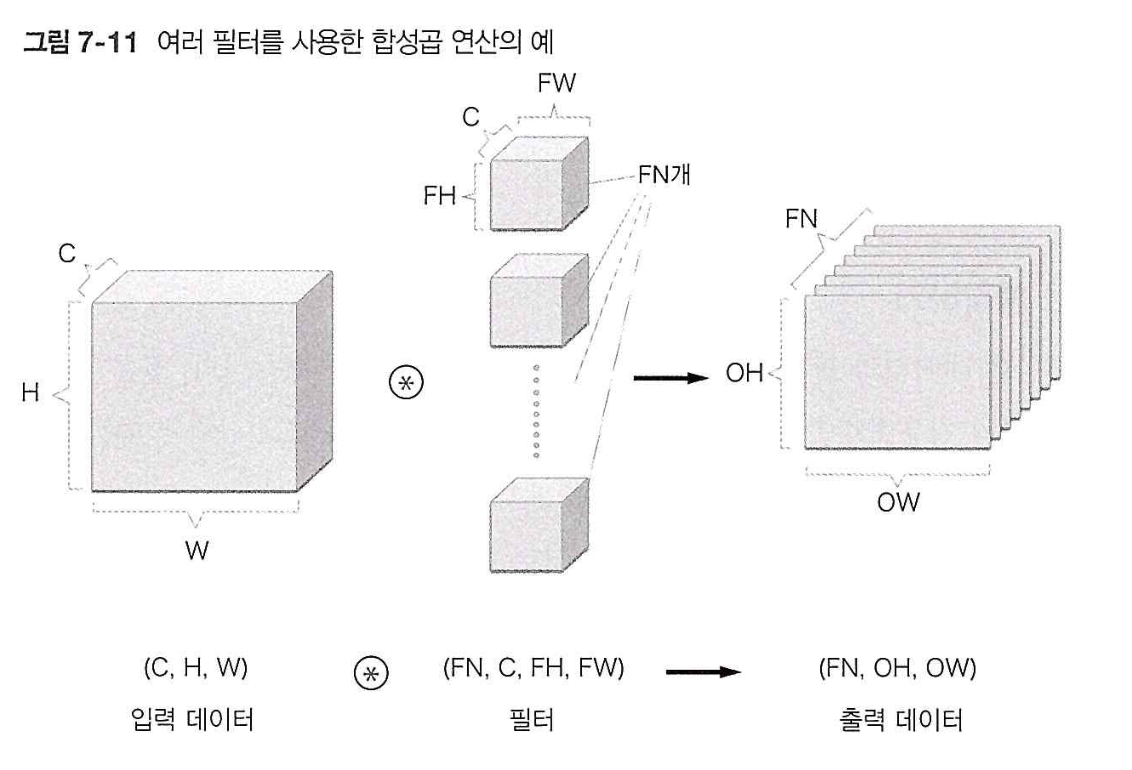

In [ ]:
Image(path + '/4.png') # 이미지가 해당 경로의 폴더 안에 정상적으로 들어있어야 이미지가 로딩됩니다!

답: FN=3, P=2

In [34]:
import numpy as np

### 5. 다음은 교재의 im2col 함수의 소스 코드이다.

In [35]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

####  교재 내용으로 미루어 보아 아래에서 두번째 줄의 reshape(N * out_h * out_w, -1)에서 -1에 대응하는 적절한 크기는 무엇이겠는가? (2점)

답:C x filter_h  x filter_w

### 6. 합성곱 신경망이 다음과 같이 구성되었다고 할 때 각 층을 지날 때마다 데이터의 형상이 어떻게 바뀌는지 (1) ~ (4) 빈칸을 채우시오. (단 Shape은 (C, H, W)를 나타내며 데이터의 개수(N)는 1개, 필터의 채널은 항상 적절하다고 가정한다) (각 1점)
- ConvK-N: KxK 크기의 N개 필터를 가진 합성곱 층을 나타낸다. 패딩의 크기는 2이고, 스트라이드는 1로 한다.
- PoolK: KxK 크기의 최대 풀링을 수행하는 풀링 층을 나타낸다. 패딩은 하지 않고, 스트라이드는 2로 한다.

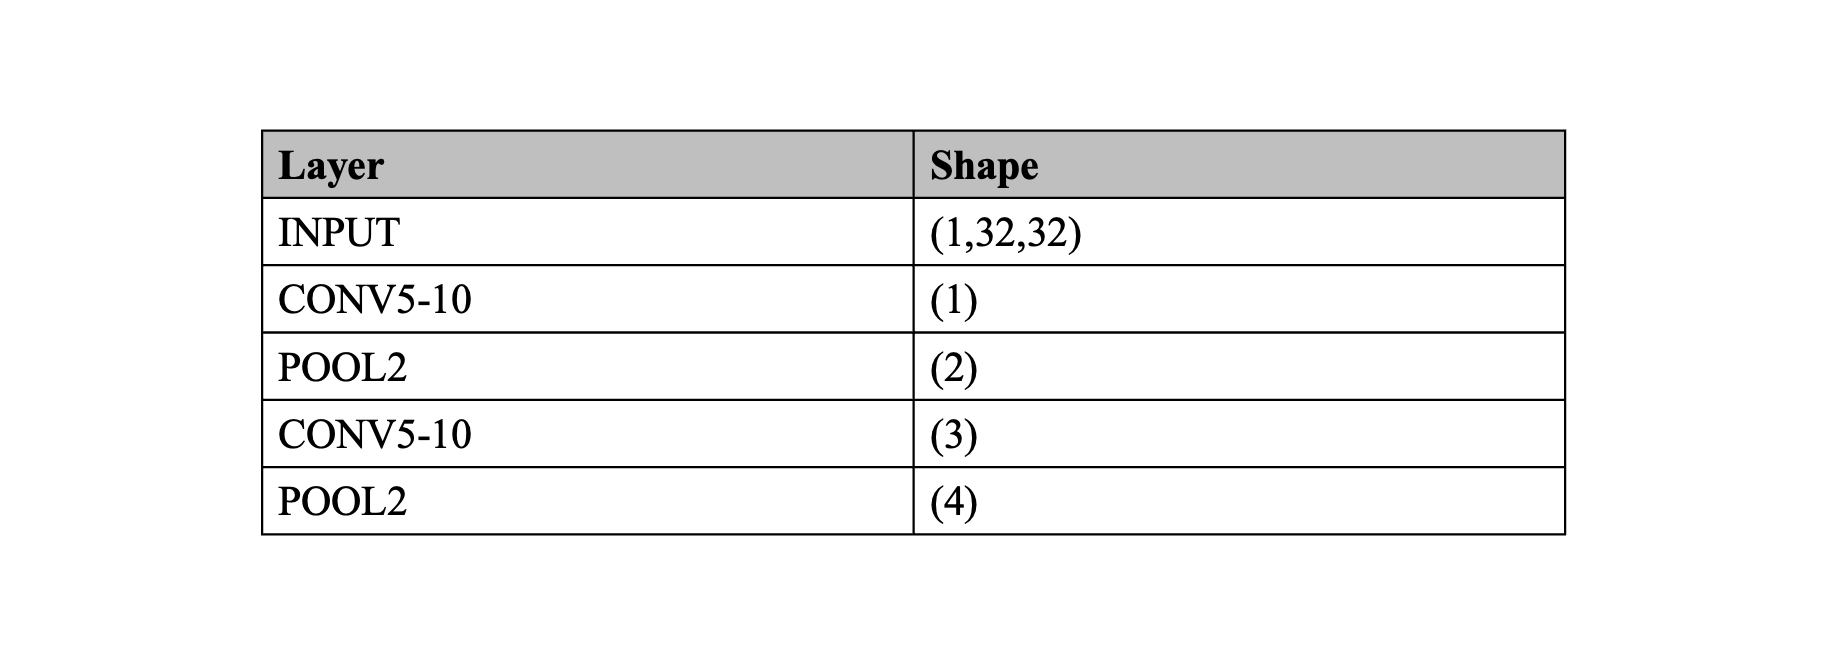

In [ ]:
Image(path + '/6.png') # 이미지가 해당 경로의 폴더 안에 정상적으로 들어있어야 이미지가 로딩됩니다!

- (1) 10,32,32
- (2) 10,16,16
- (3) 10,16,16
- (4) 10,8,8